In [1]:
import torchvision
from PIL import Image
import torchvision.transforms as transforms

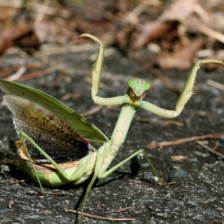

In [2]:
resize = transforms.Compose([
        transforms.Resize(224),
        transforms.RandomCrop(224),
    ])

PATH = "./images/kamakiri.jpg"
image = Image.open(PATH).convert("RGB")
display(resize(image))

In [3]:
import torch
from models.imagenet.resnet import resnet152

PRETRAINED = "./pretrained_imagenet/model_best.pth.tar"

checkpoint = torch.load(PRETRAINED)

model = resnet152(pretrained=False)
model = torch.nn.DataParallel(model).cuda()
model.load_state_dict(checkpoint['state_dict'])
model.eval()

DataParallel(
  (module): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
      

In [4]:
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
    ])

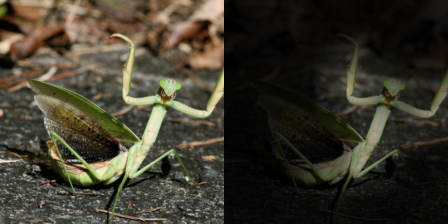

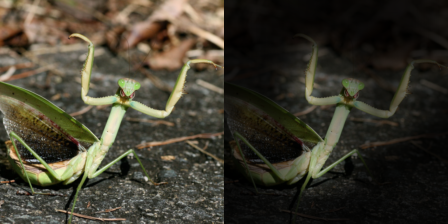

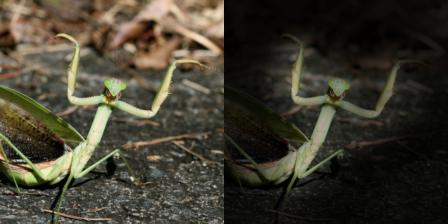

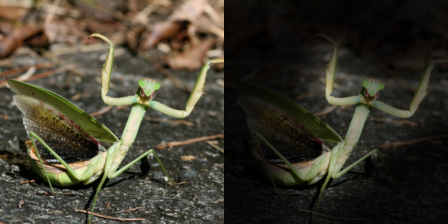

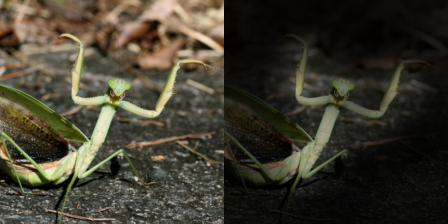

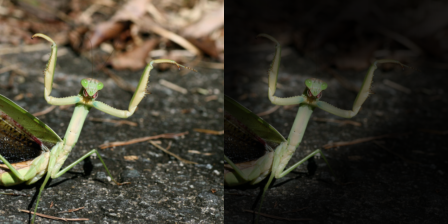

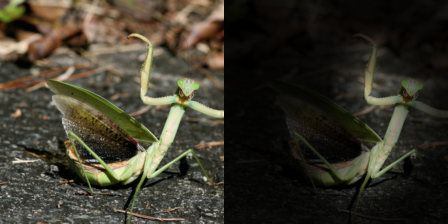

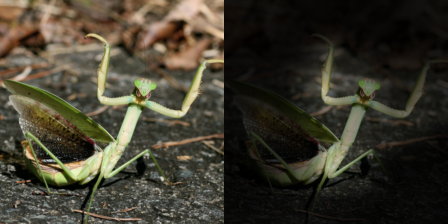

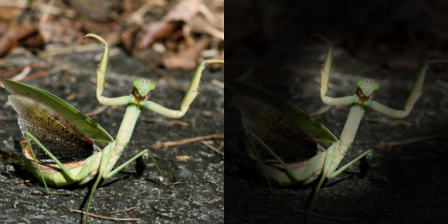

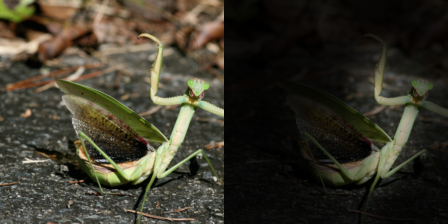

In [7]:
for i in range(10):
    with torch.no_grad():
        resized = resize(image)
        zero = Image.new("RGB", resized.size, 0)
        inputs = torch.stack([
            transform(resized)
        ]).cuda()

        att_outputs, outputs, attention = model(inputs)

        resize_attention = transforms.Resize((224, 224))
        masked = Image.composite(
                resized, 
                zero, 
                resize(transforms.functional.to_pil_image(attention[0][0]))
            )
        
        dst = Image.new('RGB', (resized.width + masked.width, resized.height))
        dst.paste(resized, (0, 0))
        dst.paste(masked, (resized.width, 0))
        display(dst)